2. Data Import and Export Using Pandas:
Task: Write a Python script to import the dataset using the Pandas library.
Understand the structure of the data by examining rows, columns, and basic
characteristics like data types and missing values.

In [9]:
import pandas as pd

# Load the dataset
file_path = "/mnt/data/customer_churn_dataset-testing-master.csv"
data = pd.read_csv('customer_churn_dataset-testing-master.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(data.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None

First 5 rows:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1        

In [10]:
print(data.isnull().sum())


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


3. Exploratory Data Analysis (EDA):
Task: Conduct EDA to uncover patterns, spot anomalies, and form hypotheses
about factors influencing customer churn. Utilize statistical summaries and
visualizations to understand the data’s underlying distribution and relationships.

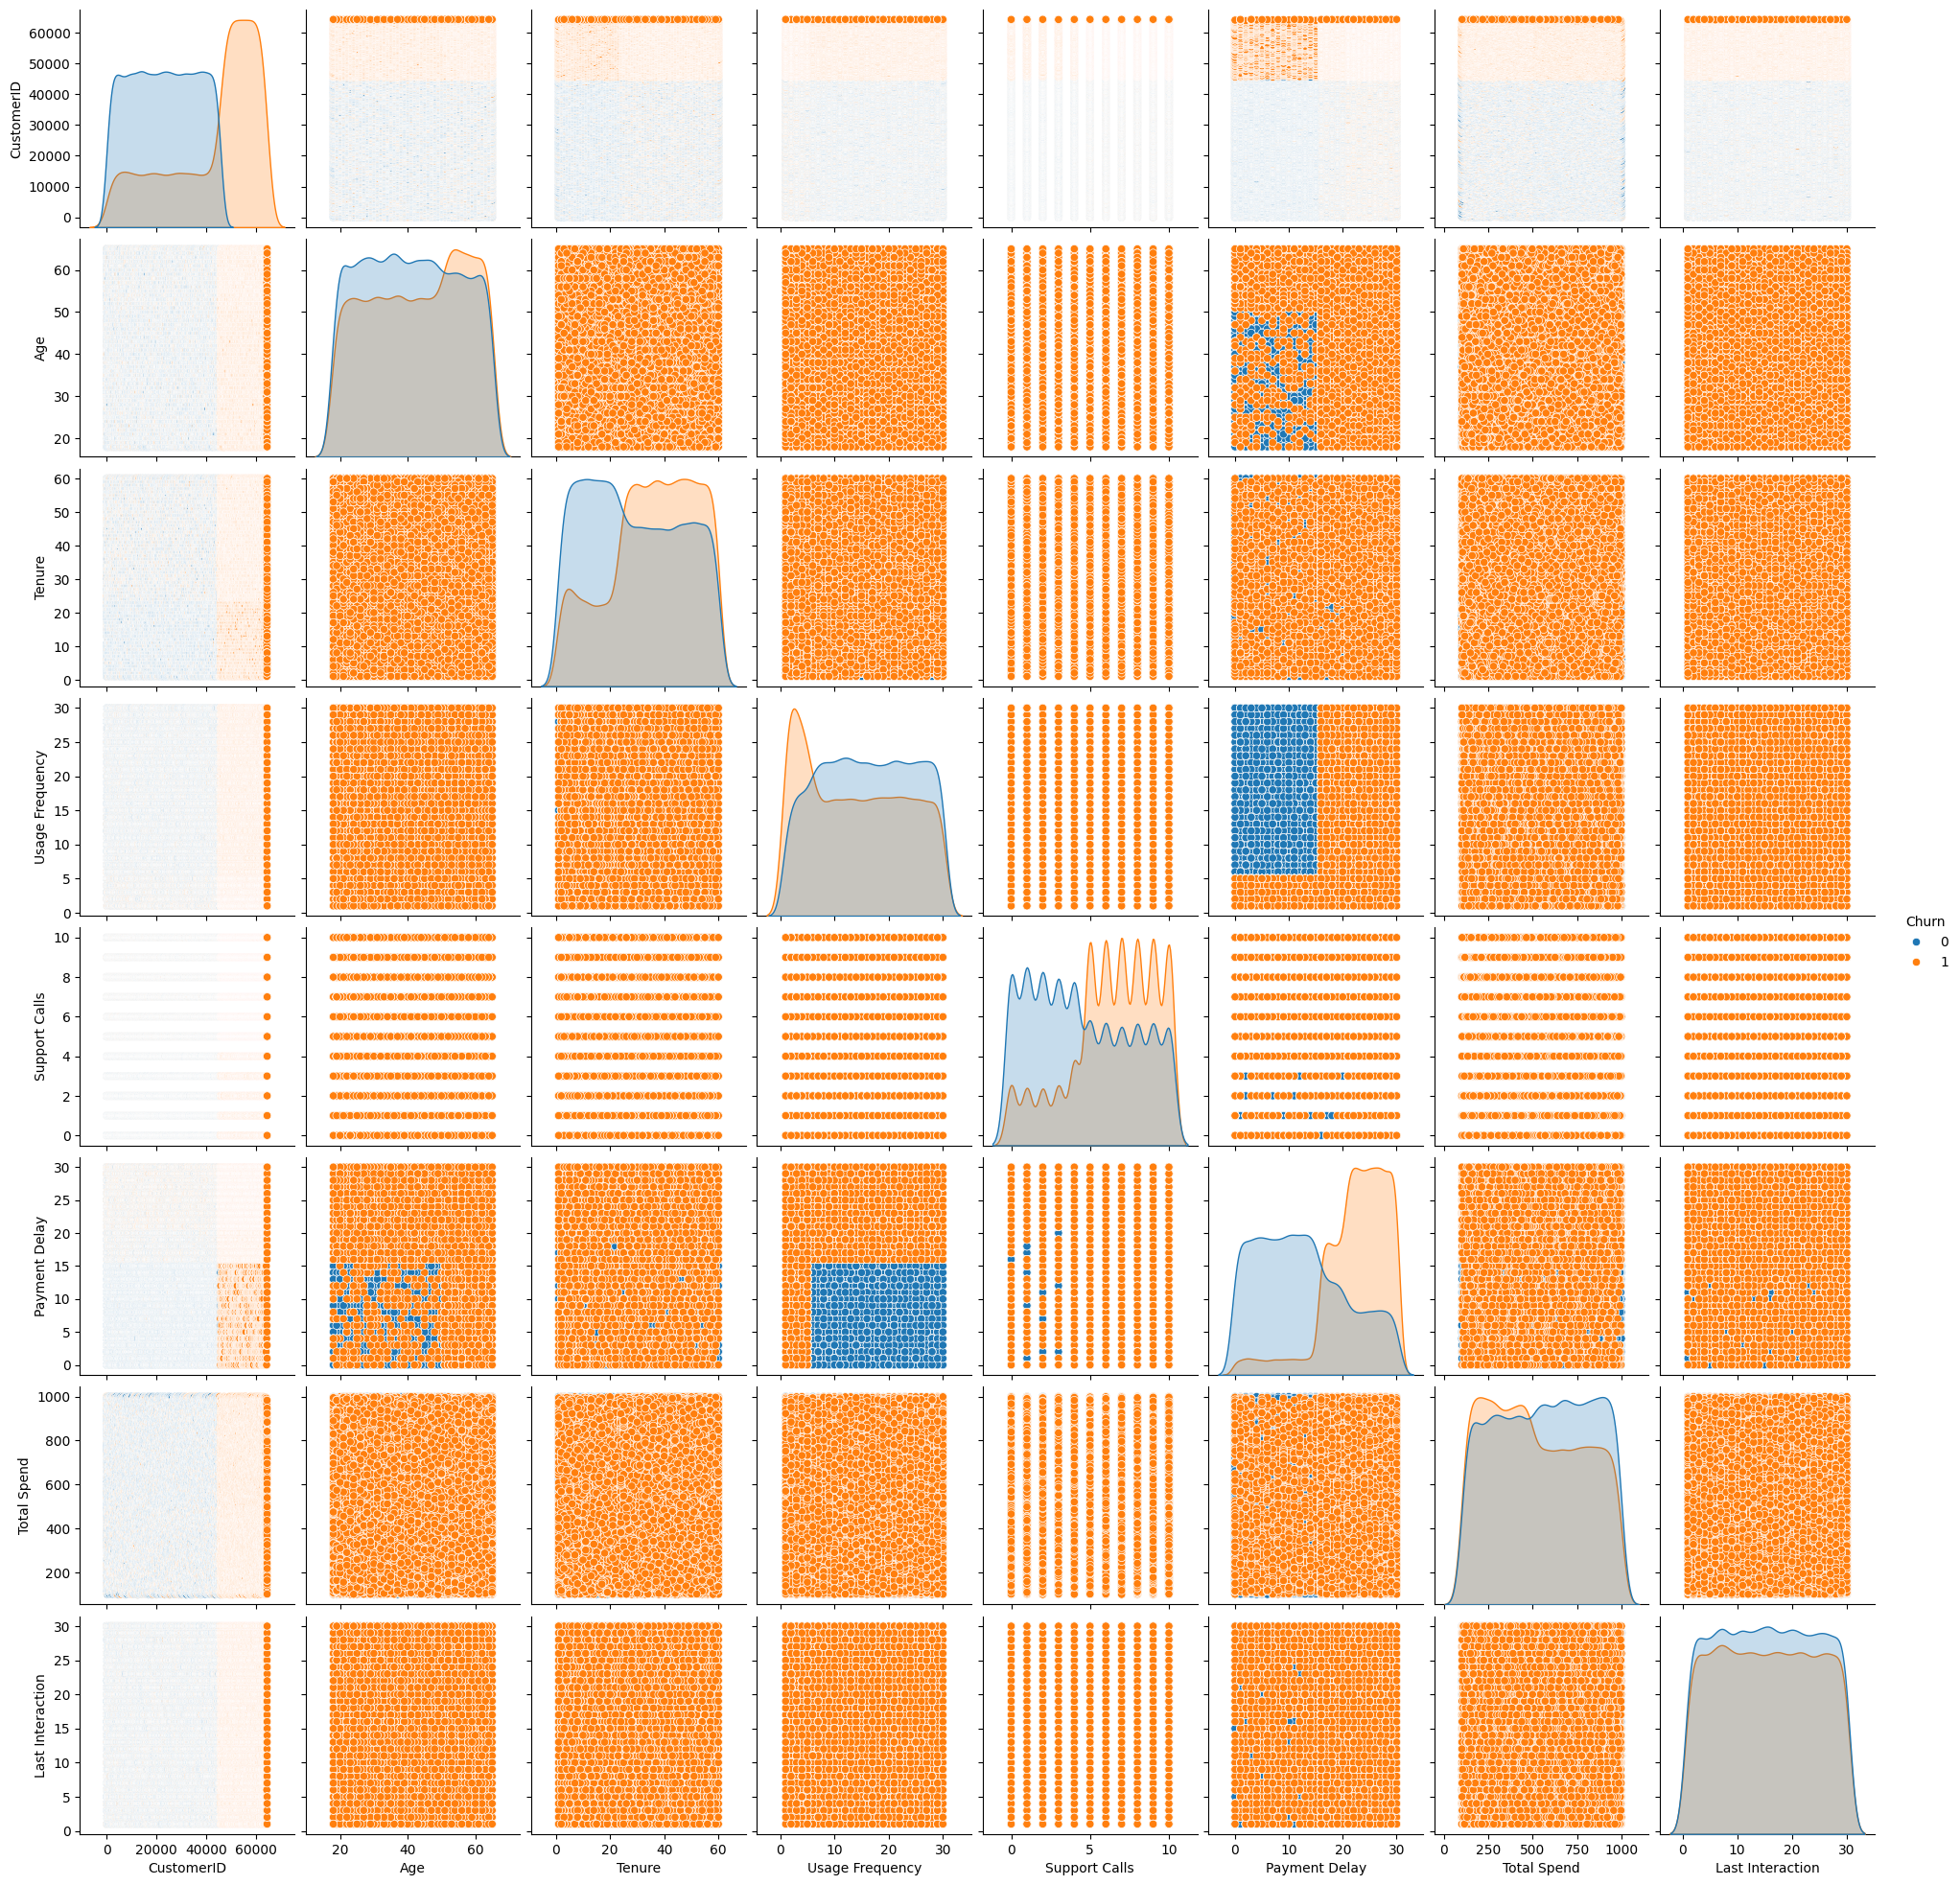

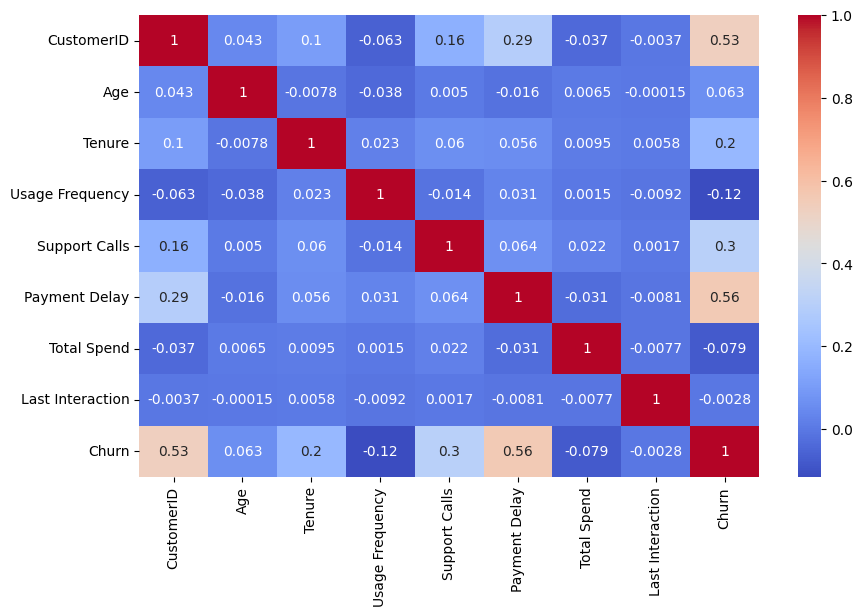

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Include 'Churn' column with numeric columns
numeric_cols = list(data.select_dtypes(include=['float64', 'int64']).columns)

# Ensure 'Churn' is part of the selected columns for pairplot
if 'Churn' not in numeric_cols:
    numeric_cols.append('Churn')

# Pairplot with numeric columns and 'Churn' as hue
sns.pairplot(data[numeric_cols], hue='Churn')

# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

4. Handling Missing Values and Outliers:
Task: Implement data cleaning techniques to handle missing values either by filling
them with appropriate values or removing the rows/columns. Detect and manage
outliers in the dataset to prevent skewed results.

In [ ]:
# Display missing values again for reference
print("\nMissing Values Before Handling:")
print(data.isnull().sum())

# Fill missing numerical values with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Fill missing categorical values with the mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(data.isnull().sum())




Missing Values Before Handling:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

Missing Values After Handling:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [ ]:
# Capping outliers using the 1.5*IQR rule
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Verify changes
print("\nOutlier Handling Done. Numerical Column Summary:")
print(data[numerical_columns].describe())



Outlier Handling Done. Numerical Column Summary:
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000    

5. Feature Engineering and Encoding:
Task: Create new features that might help in predicting churn more accurately.
Apply one-hot encoding to categorical variables to make them suitable for
modeling.

In [ ]:
# Check categorical columns again
print("\nCategorical Columns:")
print(categorical_columns)

# Apply one-hot encoding to categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("\nData After Encoding:")
print(data_encoded.head())

# Verify the updated shape
print("\nShape After Encoding:", data_encoded.shape)




Categorical Columns:
Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

Data After Encoding:
   CustomerID  Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0           1   22      25               14              4             27   
1           2   41      28               28              7             13   
2           3   47      27               10              2             29   
3           4   35       9               12              5             17   
4           5   53      58               24              9              2   

   Total Spend  Last Interaction  Churn  Gender_Male  \
0          598                 9      1        False   
1          584                20      0        False   
2          757                21      0         True   
3          232                18      0         True   
4          533                18      0        False   

   Subscription Type_Premium  Subscription Type_Standard  \
0                     

6. Feature Scaling:
Task: Standardize or normalize numerical features to ensure that the model does
not become biased towards variables with higher magnitude.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

print("\nData After Scaling (First 5 Rows):")
print(data_encoded[numerical_columns].head())



Data After Scaling (First 5 Rows):
   CustomerID       Age    Tenure  Usage Frequency  Support Calls  \
0   -1.732024 -1.434202 -0.409100        -0.122526      -0.449807   
1   -1.731970 -0.069730 -0.233642         1.465424       0.513590   
2   -1.731916  0.361155 -0.292128        -0.576225      -1.092072   
3   -1.731862 -0.500616 -1.344876        -0.349375      -0.128674   
4   -1.731809  0.792041  1.520939         1.011724       1.155855   

   Payment Delay  Total Spend  Last Interaction     Churn  
0       1.114538     0.218408         -0.752324  1.054091  
1      -0.467000     0.164742          0.521065 -0.948685  
2       1.340472     0.827900          0.636827 -0.948685  
3      -0.015132    -1.184575          0.289540 -0.948685  
4      -1.709637    -0.030756          0.289540 -0.948685  


7. Dimensionality Reduction Using PCA:
Task: Apply PCA to reduce the dimensionality of the dataset, especially if there are
many features, to improve model performance and reduce computational cost.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
data_pca = pca.fit_transform(data_encoded)

print("\nData After PCA (Shape):", data_pca.shape)




Data After PCA (Shape): (64374, 11)


8.Handling Imbalanced Data:
Task: Since churn datasets are typically imbalanced, apply techniques such as
SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights to
manage the imbalance before training the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load dataset
file_path = '/mnt/data/customer_churn_dataset-testing-master.csv'
data = pd.read_csv('customer_churn_dataset-testing-master.csv')

# Define features (X) and target (y)
X = data.drop(columns=['CustomerID', 'Churn'])  # Drop irrelevant columns
y = data['Churn']

# Convert categorical features to numerical
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
model_with_smote = RandomForestClassifier(random_state=42)
model_with_smote.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_smote = model_with_smote.predict(X_test)

# Classification report
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))



Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



9. Model Building:
o Task: Use machine learning algorithms like logistic regression, random forest, or
gradient boosting to build a model that can predict customer churn. Evaluate models
based on appropriate metrics (e.g., accuracy, recall, F1-score)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocessing: Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target (y)
X = data_encoded.drop(columns=['Churn'])  # Replace 'Churn' with the actual target column name
y = data_encoded['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic) * 100:.2f}%")
print(classification_report(y_test, y_pred_logistic))

# Train and evaluate Random Forest
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb) * 100:.2f}%")
print(classification_report(y_test, y_pred_gb))

# Generate confusion matrices
print("Confusion Matrices:")
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))


Logistic Regression Results:
Accuracy: 86.09%
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6776
           1       0.85      0.85      0.85      6099

    accuracy                           0.86     12875
   macro avg       0.86      0.86      0.86     12875
weighted avg       0.86      0.86      0.86     12875

Random Forest Results:
Accuracy: 99.70%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6776
           1       1.00      0.99      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Gradient Boosting Results:
Accuracy: 99.50%
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6776
           1       1.00      0.99      0.99      6099

    accuracy                           0.99     1287

10. Data Visualization:
o Task: Use Matplotlib and Seaborn to create visualizations that summarize the
findings and model performance, such as ROC curves, confusion matrices, and
feature importance charts.

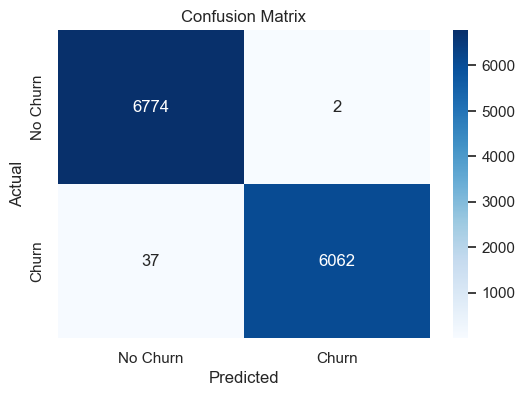

C:\Users\soham\AppData\Local\Temp\ipykernel_15880\1747091846.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guess')


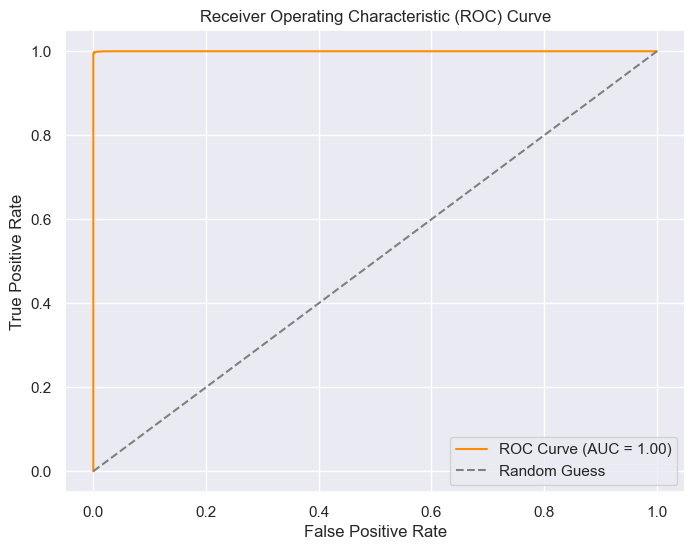

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn is properly imported


# Assume `y_test` and `y_pred_rf` are defined from Random Forest results (you can change to another model if needed)
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_rf)  # Replace `y_pred_rf` with the predictions from your desired model
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_pred_prob = random_forest_model.predict_proba(X_test)[:, 1]  # Replace with the model you're evaluating
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



11. Model Deployment:  
Task: Prepare the model for deployment in a simulated production environment  
where stakeholders can input customer data and receive churn predictions.  